In [1]:
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt

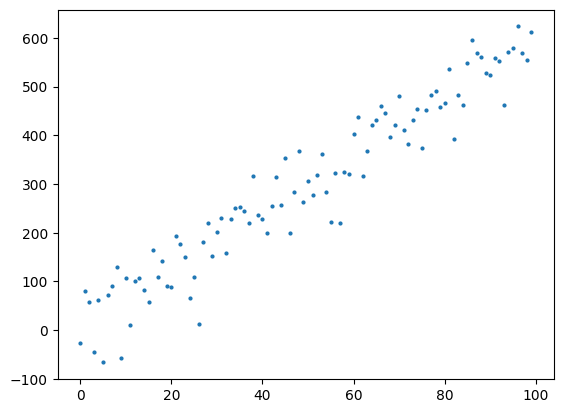

In [2]:
# Let us create some random data
data_size=100

mu, sigma = 1, 50 # mean and standard  deviation
error=np.random.normal(mu, sigma, data_size)

x = np.arange(0 ,  data_size )
y = (6 * x) + error

plt.plot(x, y, 'o', markersize=2)

plt.show()

In [3]:
%matplotlib ipympl 
plt.rcParams['animation.html'] = 'jshtml'

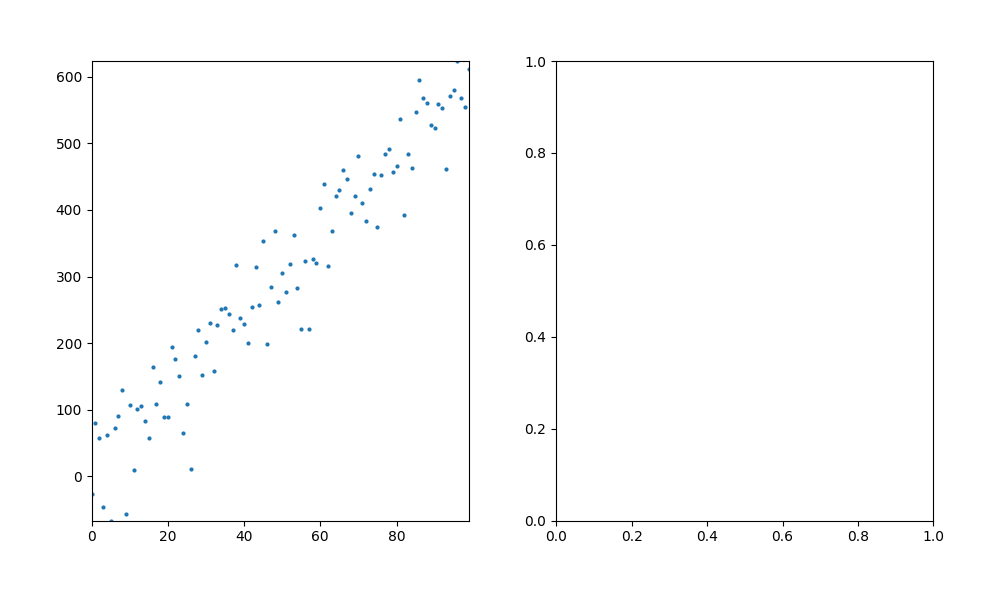

In [4]:
###### fig = plt.figure()
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

# first subfigure 
ax1=plt.subplot(1, 2, 1)

ax1.set_xlim(left = np.min(x), right=np.max(x))
ax1.set_ylim(bottom = np.min(y), top=np.max(y))

ax1.plot(x, y, 'o', markersize=2)

# second sub-figure 
plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)

plt.tight_layout(pad=4.0)


In [5]:
b_current = 0 
m_current = 0
learningRate = 0.00001
num_iteration = 100 
precision = 0.1
previous_step_size = 1 

n = float(len(y)) 
print("Sample size", n)

oldCost=0
# Start of iterations
# Capital X and Y are numpy Arrays
# These two variables are just for visualtion 
xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y_prediction - y)**2)

ax2.set_xlim(left = 0, right=num_iteration)
ax2.set_ylim(bottom = 0, top=initCost)
# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x + b_current
    # We compute costs just for monitoring 
    cost= (1/n) * sum (( y_prediction - y)**2)
    # calculate gradients. 
    m_gradient = (1.0/n) * sum (x*(y_prediction - y) )
    b_gradient = (1.0/n) * sum (y_prediction - y)
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    oldCost = cost
    # Visualization 
    # abline(fig, ax1, m_current, b_current)
    x_vals = np.array(ax1.get_xlim())
    y_vals = m_current * x_vals  + b_current
    
    ax1.clear()
    ax1.set_xlim(left = np.min(x), right=np.max(x))
    ax1.set_ylim(bottom = np.min(y), top=np.max(y))
    ax1.plot(x, y, 'o', markersize=2)
    ax1.plot(x_vals, y_vals,  '-',  color='red', linewidth=2.0)
    # fig.canvas.draw()
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)    
    ax2.plot(xx, costHist, color='blue')
    fig.canvas.draw()
    if(i % 10 ==0):
        print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 

print("m = ", m_current, " b=", b_current)

Sample size 100.0
Iteration No.= 0  m =  0.19743799619773805  b= 0.002991150562460979  Cost= 121206.12992932207
Iteration No.= 10  m =  1.8481117159037477  b= 0.028022283467061877  Cost= 63365.0368661258
Iteration No.= 20  m =  3.0301545539435892  b= 0.04598807961235756  Cost= 33704.37025276268
Iteration No.= 30  m =  3.876611951421453  b= 0.058894404156069516  Cost= 18494.506415415082
Iteration No.= 40  m =  4.482757426828182  b= 0.06817765228477293  Cost= 10694.952753578564
Iteration No.= 50  m =  4.916816116254813  b= 0.07486642311645392  Cost= 6695.374618949139
Iteration No.= 60  m =  5.227643874595454  b= 0.0796972939909846  Cost= 4644.407765819073
Iteration No.= 70  m =  5.450226261340229  b= 0.0831977261594333  Cost= 3592.680486528182
Iteration No.= 80  m =  5.6096163509976  b= 0.08574543334760162  Cost= 3053.359008956672
Iteration No.= 90  m =  5.723754589610846  b= 0.08761089544073974  Cost= 2776.797046234985
Iteration No.= 100  m =  5.805488087187297  b= 0.08898780243031547  